## SEIR model

In [1]:
# coding=utf-8
# This is a sample Python script.
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as spi
import time
import pandas as pd

1. S (Susceptible)，易感者，指缺乏免疫能力健康人，与感染者接触后容易受到感染；
1. E (Exposed)，暴露者 ，指接触过感染者但不存在传染性的人，可用于存在潜伏期的传染病；
1. I (Infectious)，患病者，指有传染性的病人，可以传播给 S，将其变为 E 或 I ；
1. R (Recovered)，康复者，指病愈后具有免疫力的人，如是终身免疫性传染病，则不可被重新变为 S 、E 或 I ，如果免疫期有限，就可以重新变为 S 类，进而被感染。

微分方程: 对于微分方程应该设置极小的步长,符合微积分的思想

N*ds(t)/dt = m*N*r(t) - b*s(t)*N*i(t)

N*de(t)/dt = b*s(t)*N*i(t) - f*N*e(t)

N*di(t)/dt = f*N*e(t) - z*N*i(t)

N*dr(t)/dt = z*N*i(t) - m*N*r(t)

ds(t)/dt = m*r(t) - b*s(t)*i(t)

de(t)/dt = b*s(t)*i(t) - f*e(t)

di(t)/dt = f*e(t) - z*i(t)

dr(t)/dt = z*i(t) - m*r(t)

每一步骤变化顺序 E、I、R、S

In [2]:
# 总人数一百万人，假设初始感染者1000人，其余人为易感染，按毫秒计算
# 假设E状态不具有传染性

# total population
N = 1409778724
# Susceptible N*s(t)
s = 1409685009
# Exposed N*e(t)
e = 0
# Infectious N*i(t)
i = 547
# Recovered N*r(t)
r = 0


# each day contact
b = 5
# disease incidence
f = 0.4
# the cure rate
z = 0.1


# each day state
state = [s, e, i, r]
# T0
ini = [s, e, i, r]

# result
whole_t = []
eachday = []
case = []

whole_t.append(state)

In [3]:
# 微分模型
def funcSEIR(inivalue,_):
    result = np.zeros(4)
    result[0] = - b * inivalue[0] / N * inivalue[2]
    result[1] = b * inivalue[0] / N * inivalue[2] - f * inivalue[1]
    result[2] = f * inivalue[1] - z * inivalue[2]
    result[3] = z * inivalue[2]
    return result


In [4]:
# 计算结果
result = spi.odeint(funcSEIR,ini,np.arange(0,80))

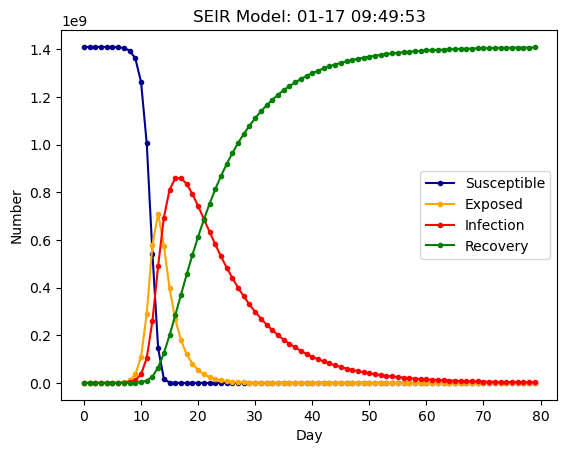

In [5]:
# plot the result
plt.plot(result[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(result[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(result[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(result[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model: ' + time.strftime('%m-%d %H:%M:%S',time.localtime(time.time())))
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()


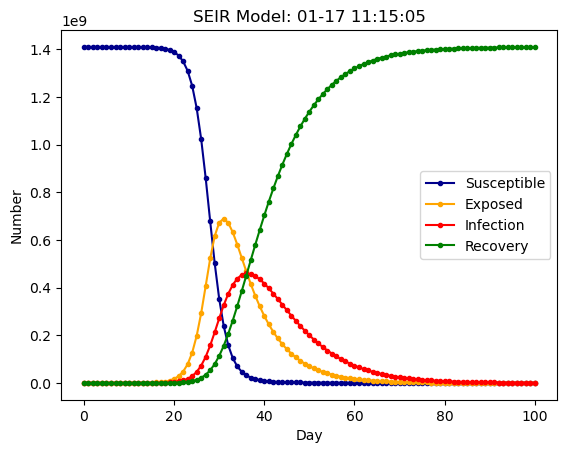

In [33]:
# N为人群总数
N = 1409778724
# β为传染率系数
beta = 0.56
# gamma为恢复率系数
gamma = 0.142
# Te为疾病潜伏期
Te = 7
# I_0为感染者的初始人数
I_0 = 547
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 100

# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

def funcSEIR(inivalue,_):
 Y = np.zeros(4)
 X = inivalue
 # 易感个体变化
 Y[0] = - (beta * X[0] *( X[2]+X[1])) / N
 # 潜伏个体变化
 Y[1] = (beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染个体变化
 Y[2] = X[1] / Te - gamma * X[2]
 # 治愈个体变化
 Y[3] = gamma * X[2]
 return Y

T_range = np.arange(0,T + 1)

RES = spi.odeint(funcSEIR,INI,T_range)

plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model: ' + time.strftime('%m-%d %H:%M:%S',time.localtime(time.time())))
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

## China covid cases number

data source:https://ourworldindata.org/coronavirus/country/china

In [20]:
csv = pd.read_csv("./data_csv/owid-covid-data.csv")
# csv.info()
csv.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [21]:
csv_china = csv.query("location == 'China'")

csv_china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
44127,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44128,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44129,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44130,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44131,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN


In [22]:
result_csv = csv_china[["iso_code", "location", "date", "total_cases", "total_deaths"]].reset_index().drop(["index"],axis=1)
# result_csv.head(10)
result_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1067 non-null   object 
 1   location      1067 non-null   object 
 2   date          1067 non-null   object 
 3   total_cases   1067 non-null   float64
 4   total_deaths  1067 non-null   float64
dtypes: float64(2), object(3)
memory usage: 41.8+ KB


In [23]:
# 2020-01-27
result_csv["year"] = result_csv["date"].map(lambda x: str(x)[0:4]).astype("int")
result_csv["month"] = result_csv["date"].map(lambda x: str(x)[5:7]).astype("int")
result_csv["day"] = result_csv["date"].map(lambda x: str(x)[8:]).astype("int")

result_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1067 non-null   object 
 1   location      1067 non-null   object 
 2   date          1067 non-null   object 
 3   total_cases   1067 non-null   float64
 4   total_deaths  1067 non-null   float64
 5   year          1067 non-null   int32  
 6   month         1067 non-null   int32  
 7   day           1067 non-null   int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 54.3+ KB


In [24]:
# filter the date
result_csv = result_csv.query("year != 2022 | month != 11").query("year != 2022 | month != 12")
result_csv.head()

,iso_code,location,date,total_cases,total_deaths,year,month,day
0,CHN,China,2020-01-22,547.0,17.0,2020,1,22
1,CHN,China,2020-01-23,639.0,18.0,2020,1,23
2,CHN,China,2020-01-24,916.0,26.0,2020,1,24
3,CHN,China,2020-01-25,1399.0,42.0,2020,1,25
4,CHN,China,2020-01-26,2062.0,56.0,2020,1,26


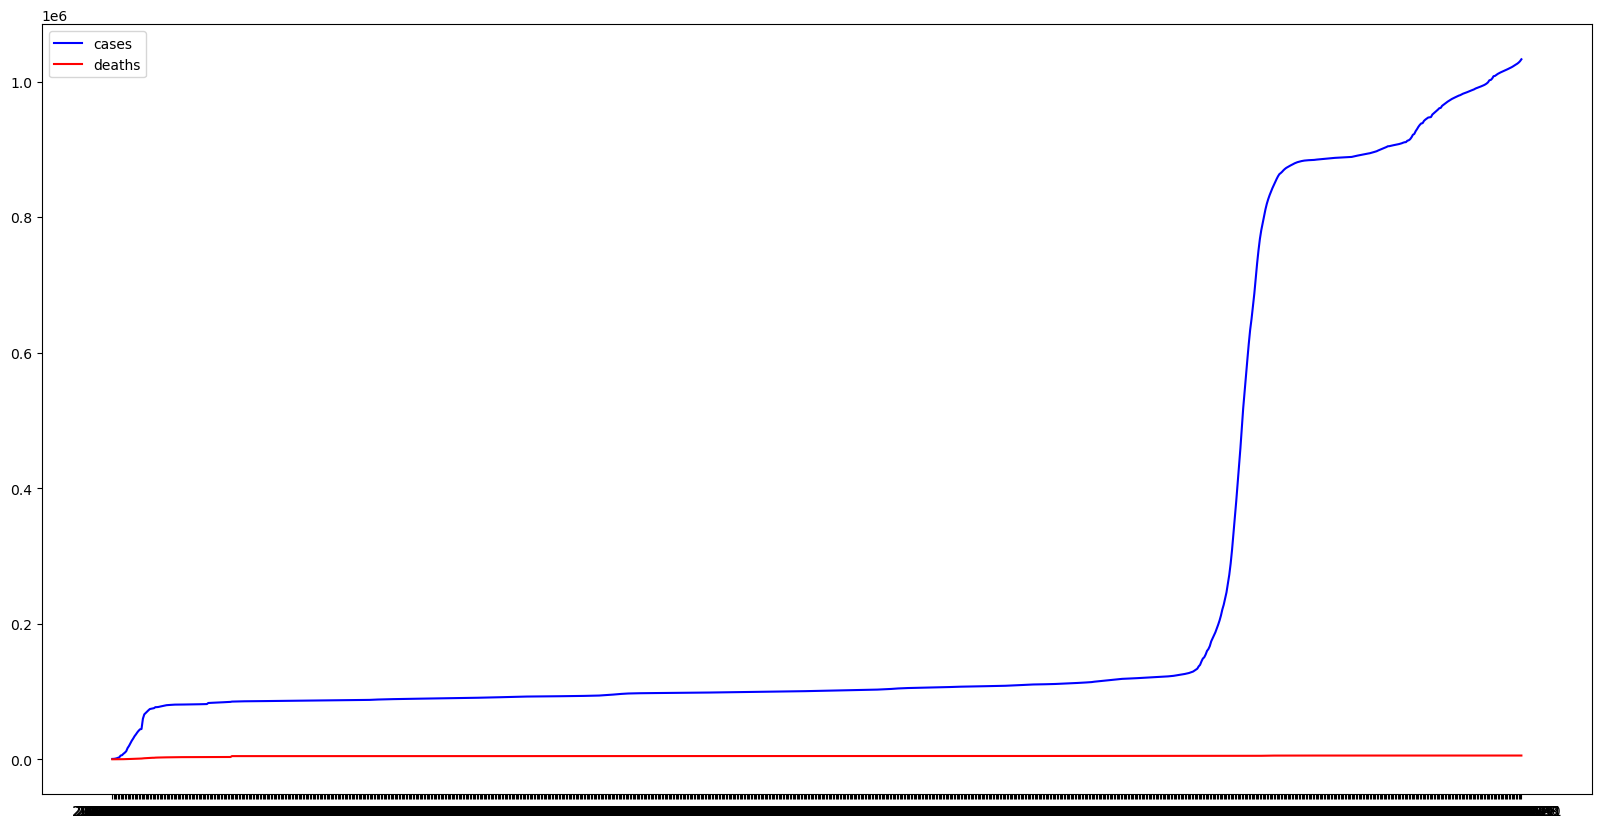

In [25]:
x = result_csv["date"]
y1 = result_csv["total_cases"]
y2 = result_csv["total_deaths"]


plt.figure(figsize=(20, 10), dpi=100)

plt.plot(x, y1, color='blue', label='cases')
plt.plot(x, y2, color='red', label='deaths')

# plt.grid(alpha=0.4)

plt.legend(loc='upper left')

plt.show()

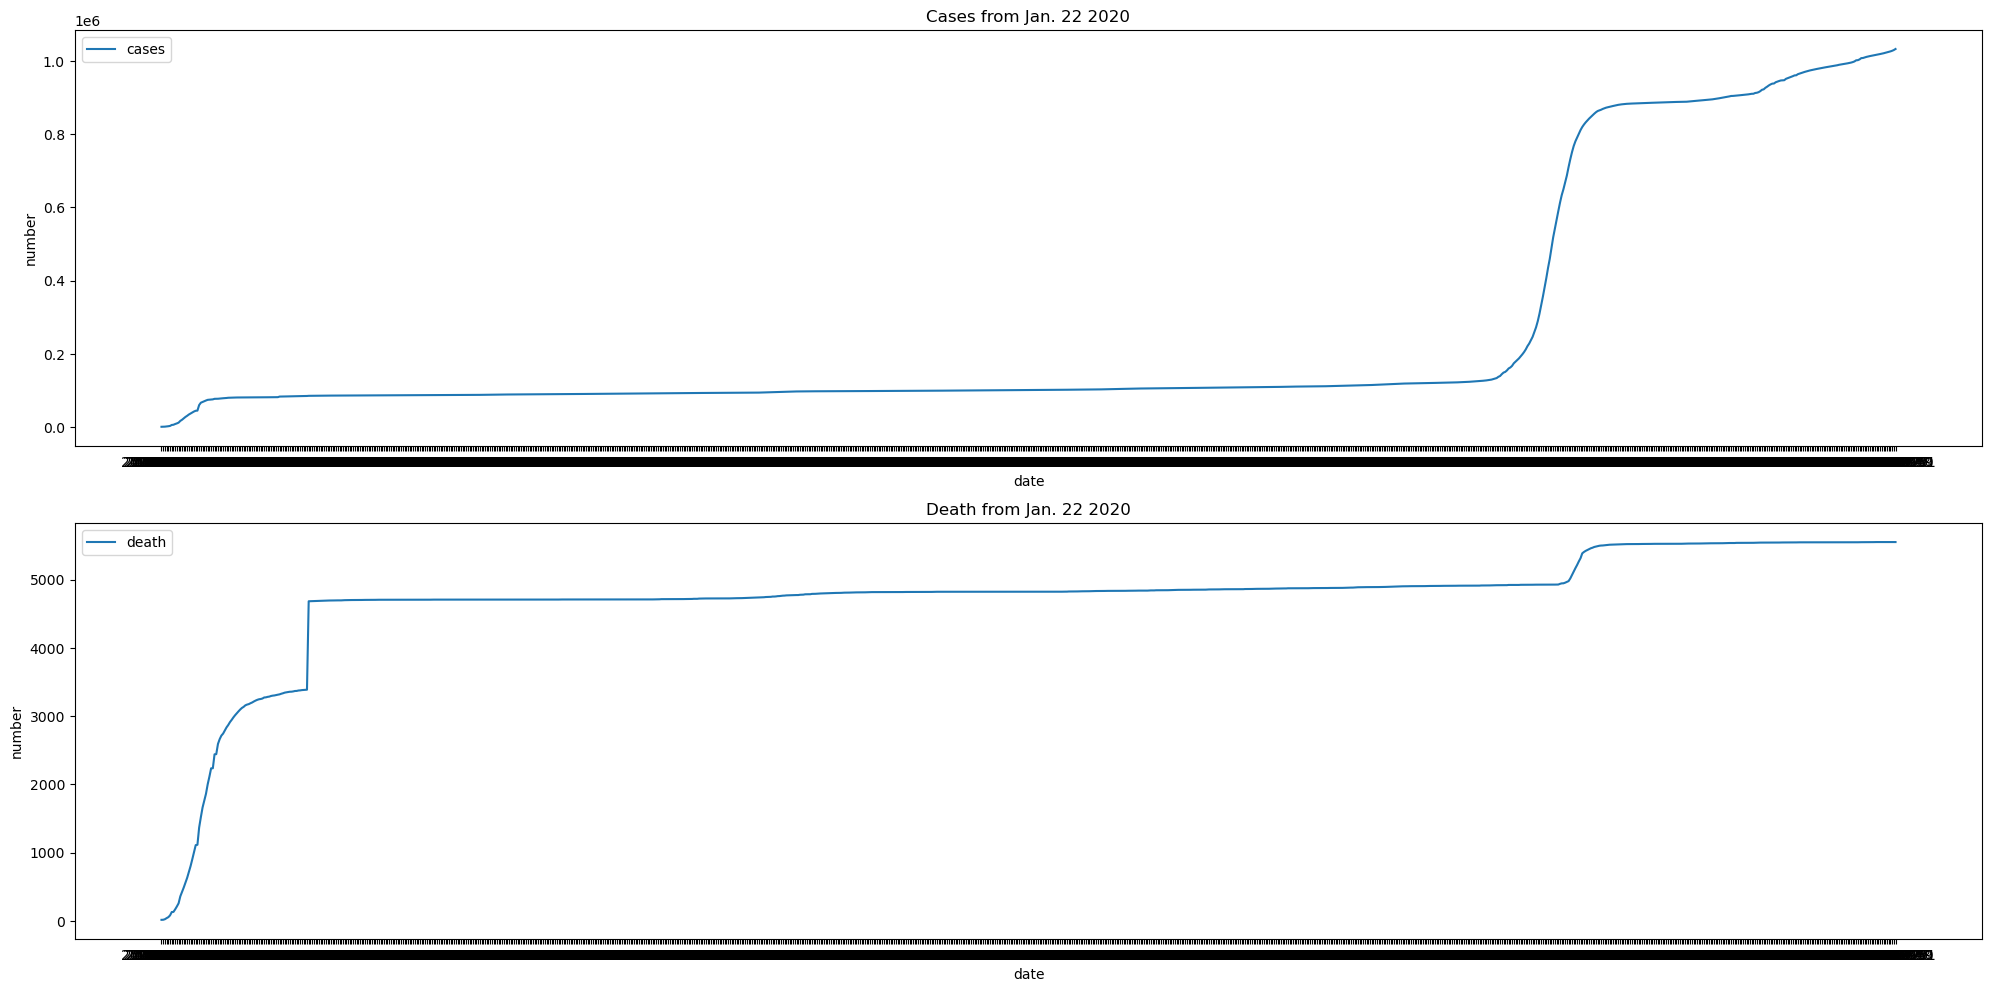

In [26]:
x = result_csv["date"]
y1 = result_csv["total_cases"]
y2 = result_csv["total_deaths"]

plt.figure(figsize=(20, 10), dpi=100)

# cases
plt.subplot(2,1,1)
plt.title("Cases from Jan. 22 2020")
plt.plot(x, y1, label = "cases")
plt.xlabel("date")
plt.ylabel("number")
plt.legend()

# death
plt.subplot(2,1,2)
plt.title("Death from Jan. 22 2020")
plt.plot(x, y2, label = "death")
plt.xlabel("date")
plt.ylabel("number")
plt.legend()


plt.tight_layout(pad = 1)
plt.show()


## Combine result

In [27]:
# Calculate the total predict cases
case_sum = 0
narr_case = []

In [28]:
case_sum

0

In [29]:
for index in range(len(result[:,2])):
    case_sum = case_sum + result[:,2][index]
    narr_case.append(case_sum)

case_pre = pd.DataFrame(narr_case)

case_pre.head(100)


,0
0,5.470000e+02
1,1.569169e+03
2,4.729749e+03
3,1.490817e+04
4,4.776603e+04
...,...
75,1.406521e+10
76,1.406822e+10
77,1.407095e+10
78,1.407341e+10


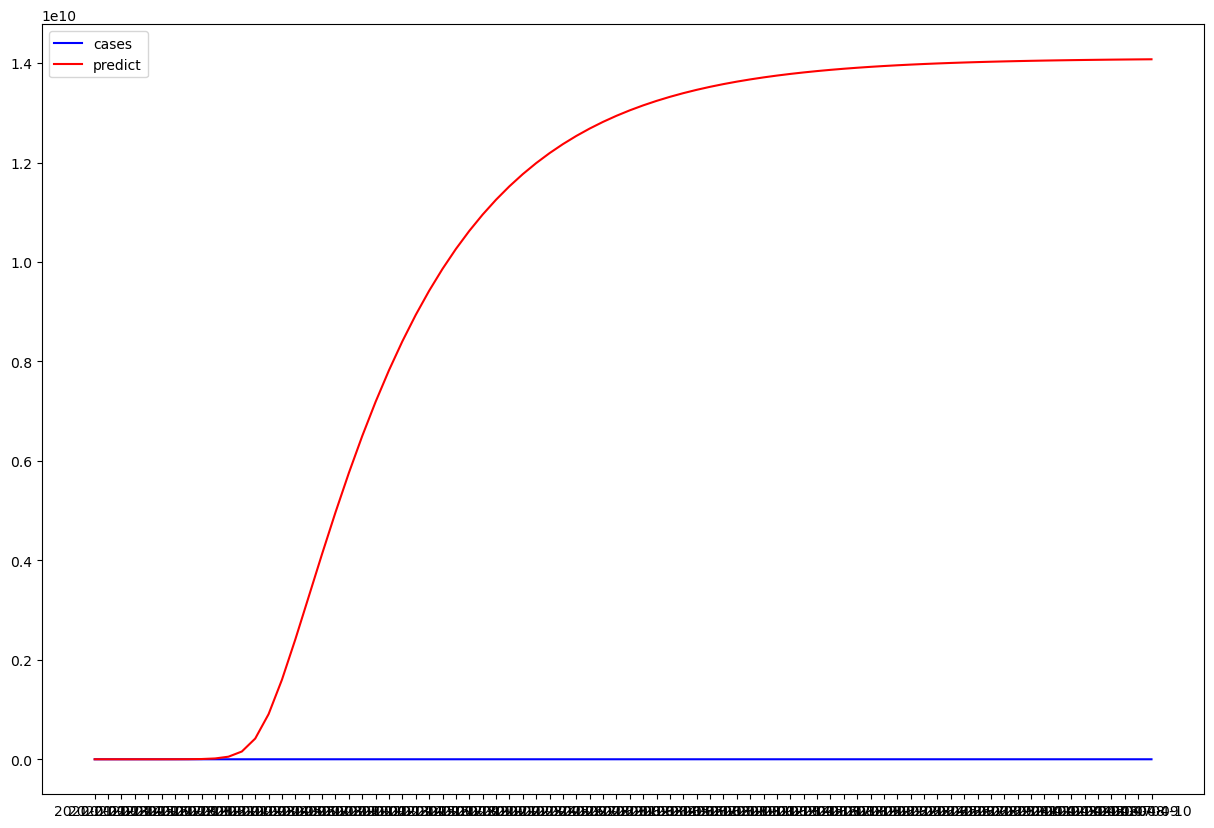

In [30]:
x = result_csv["date"][:80]
y1 = result_csv["total_cases"][:80]
y2 = case_pre[0]


plt.figure(figsize=(15, 10), dpi=100)

plt.plot(x, y1, color='blue', label='cases')
plt.plot(x, y2, color='red', label='predict')

# plt.grid(alpha=0.4)

plt.legend(loc='upper left')

plt.show()